In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cell2mol
from cell2mol.elementdata import ElementData
from pathlib import Path

In [2]:
Energies = pd.read_csv('Fe_Octhedral_complexes_rel_m_splitting.csv')
list_refcodes_225 = list(Energies['refcode'])

In [3]:
Full_dataset = pd.read_csv('Group_original_database_with_ligands_15837.txt', delimiter='\t')
Full_dataset.shape

(13512, 16)

In [4]:
# We extract only the complexes which are Octahedral iron complexes with 5 or 6 d electrons
Octahedral_iron_dataset = Full_dataset[(Full_dataset['metal'] == 'Fe') & (Full_dataset['geometry'] == 'Octahedral') & ((Full_dataset['d_elec'] == 5) | (Full_dataset['d_elec'] == 6))]
Octahedral_iron_dataset.shape

(1520, 16)

In [5]:
# The complexes which were already used for the training set should not be reused.
df = Octahedral_iron_dataset[(~Octahedral_iron_dataset['refcode'].isin(list_refcodes_225))]
df.shape

(1296, 16)

In [6]:
# Makes a list of all complexes which have many times the same ligands, all the ligands which have a value count which is not 1.
doublets_ligs = df.formula_ligs_list.value_counts()[df.formula_ligs_list.value_counts() != 1].index

df = df[
    (~df.formula_ligs_list.isin(doublets_ligs)) &
    (~df.coord_sphere.apply(lambda x: 'H' in x)) # Complexes that have a hydrogen in its coordination sphere. They have to be deleted of the calculations because they were optimised and thus not in the xyz file.
]
df.shape

(1252, 16)

In [7]:
# Only the 150 complexes with the least amount of electrons are kept.
df_150 = df.sort_values(by='N').head(150)
df_150 = df_150.copy()
df_150.loc[:, 'rel_m'] = np.nan
df_150

,refcode,metal,m_ox,totcharge,CN,N,geometry,min,coord_sphere,formula_ligs_list,TMC_formula,d_elec,elem_nr,groups,len_groups,name,rel_m
3769,PEGZIM,Fe,2,0,6,132,Octahedral,0.14,"('N', 'N', 'O', 'O', 'O', 'O')","['C2-N3', 'C2-N3', 'H2-O', 'H2-O', 'H2-O', 'H2...",H8-C4-N6-O4-Fe,6,26,['PEGZIM'],1,"Fe_2_6_Octahedral_['N', 'N', 'O', 'O', 'O', 'O']",NaN
3856,USIMOA,Fe,2,2,6,132,Octahedral,0.03,"('O', 'O', 'O', 'O', 'O', 'O')","['H4-C-O', 'H4-C-O', 'H4-C-O', 'H4-C-O', 'H4-C...",H24-C6-O6-Fe,6,26,['USIMOA'],1,"Fe_2_6_Octahedral_['O', 'O', 'O', 'O', 'O', 'O']",NaN
4186,SEDQOI,Fe,3,-2,6,135,Octahedral,0.10,"('C', 'C', 'C', 'C', 'C', 'N')","['C-N', 'C-N', 'C-N', 'C-N', 'C-N', 'H5-C5-N']",H5-C10-N6-Fe,5,26,['SEDQOI'],1,"Fe_3_6_Octahedral_['C', 'C', 'C', 'C', 'C', 'N']",NaN
2949,BQIFEC10,Fe,2,-2,6,136,Octahedral,0.39,"('C', 'C', 'C', 'C', 'N', 'N')","['C-N', 'C-N', 'C-N', 'C-N', 'H6-C6-N2']",H6-C10-N6-Fe,6,26,['BQIFEC10'],1,"Fe_2_6_Octahedral_['C', 'C', 'C', 'C', 'N', 'N']",NaN
4197,LUXKEU,Fe,3,0,6,137,Octahedral,0.14,"('C', 'C', 'C', 'N', 'N', 'N')","['C-N', 'C-N', 'C-N', 'H15-C6-N3']",H15-C9-N6-Fe,5,26,['LUXKEU'],1,"Fe_3_6_Octahedral_['C', 'C', 'C', 'N', 'N', 'N']",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,UHEZOX,Fe,3,0,6,215,Octahedral,1.50,"('Cl', 'N', 'N', 'N', 'O', 'O')","['Cl', 'H21-C19-N3-O2']",H21-C19-N3-O2-Cl-Fe,5,26,['UHEZOX'],1,"Fe_3_6_Octahedral_['Cl', 'N', 'N', 'N', 'O', 'O']",NaN
4487,TEJMUS,Fe,3,1,6,215,Octahedral,0.28,"('N', 'N', 'N', 'N', 'O', 'O')","['H13-C10-N2-O', 'H13-C10-N2-O']",H26-C20-N4-O2-Fe,5,26,['TEJMUS'],1,"Fe_3_6_Octahedral_['N', 'N', 'N', 'N', 'O', 'O']",NaN
4329,WABYIJ,Fe,3,0,6,215,Octahedral,1.18,"('Cl', 'Cl', 'N', 'N', 'O', 'O')","['Cl', 'Cl', 'H12-C13-N-O2', 'H5-C5-N']",H17-C18-N2-O2-Cl2-Fe,5,26,['WABYIJ'],1,"Fe_3_6_Octahedral_['Cl', 'Cl', 'N', 'N', 'O', ...",NaN
4617,TUBWIW,Fe,3,0,6,215,Octahedral,1.53,"('N', 'N', 'N', 'O', 'O', 'O')","['H4-C6-N-O2', 'H4-C6-N-O2', 'H4-C6-N-O2']",H12-C18-N3-O6-Fe,5,26,['TUBWIW'],1,"Fe_3_6_Octahedral_['N', 'N', 'N', 'O', 'O', 'O']",NaN


In [8]:
# Makes a list of all refcodes for easier implementation afterwards.
df_150_list_refcode = list(df_150['refcode'])

# It is verified that none of the testing complexes are in the training set.
for iron in df_150_list_refcode:
    if iron in list_refcodes_225:
        print(f'There is a doublet in the training/testing set: {iron}')

In [9]:
elementdatabase = ElementData()

In [10]:
parent_folder = Path('1-Iron')

i = 0

# Looks through all the files in the 1-Iron folder.
for entry in parent_folder.iterdir():
    # Finds the name of the complex by replacing the end of name.
    refcode = entry.name.replace('_TMC_1.gmol', '')
    # If the complex is in the dataset of octahedral iron complexes that weren't use in the training/testing of the model, calculate the R0
    if refcode in df_150_list_refcode:
        # Defines the path relative to the writing direction.
        path = f'1-Iron/{entry.name}'
        # Creates the cell2mol object
        mol = np.load(path, allow_pickle = True)
        r_rel = 0
        # First finds the iron metal center (usually the first element in the file so it could have been done in one loop, but if it was not the case, this would still work)
        for atom in mol.atoms:
            if atom.label == 'Fe':
                Fe_coords = atom.coord
                CN = atom.nbonds
                r_M = elementdatabase.CovalentRadius3[atom.label]
        # Then applies the formula to find the relative metal radius.
        for atom in mol.atoms:
            if atom.mconnec > 0 and not(atom.label == 'Fe'):
                r_rel += np.linalg.norm(np.array(atom.coord)-Fe_coords)
                r_rel -= elementdatabase.CovalentRadius3[atom.label]
        
        r_rel /= CN*r_M
        df_150.loc[df_150['refcode'] == refcode, 'rel_m'] = r_rel

        # Tracks the number of complexes to be sure that the ones in the dataset with 15837 complexes are the same as in the dataset of 1-Iron.
        i+=1

print(i)

150


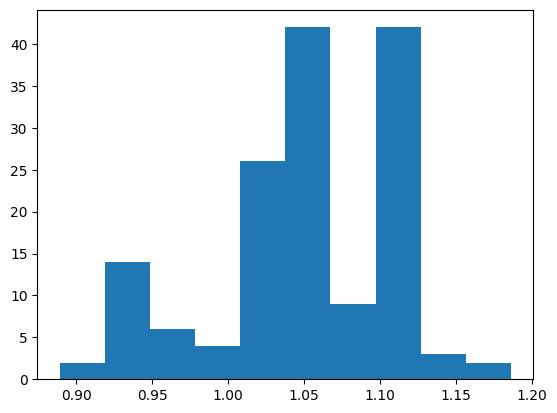

In [11]:
plt.hist(list(df_150["rel_m"]));

### It is verified the formula for the calculation of the relative metal radius was well implemented.
### It is done by comparing what is obtained when the same formula is applied to the complexes where the relative metal radius was already given.

In [12]:
i = 0
rel_m_dataset_225_calc = {}

# Looks through all the files in the 1-Iron folder.
for entry in parent_folder.iterdir():
    # Finds the name of the complex by replacing the end of name.
    refcode = entry.name.replace('_TMC_1.gmol', '')
    # If the complex is in the dataset of octahedral iron complexes that weren't use in the training/testing of the model, calculate the R0
    if refcode in list_refcodes_225:
        # Defines the path relative to the writing direction.
        path = f'1-Iron/{entry.name}'
        # Creates the cell2mol object
        mol = np.load(path, allow_pickle = True)
        r_rel = 0
        # First finds the iron metal center (usually the first element in the file so it could have been done in one loop, but if it was not the case, this would still work)
        for atom in mol.atoms:
            if atom.label == 'Fe':
                Fe_coords = atom.coord
                CN = atom.nbonds
                r_M = elementdatabase.CovalentRadius3[atom.label]
        # Then applies the formula to find the relative metal radius.
        for atom in mol.atoms:
            if atom.mconnec > 0 and not(atom.label == 'Fe'):
                r_rel += np.linalg.norm(np.array(atom.coord)-Fe_coords)
                r_rel -= elementdatabase.CovalentRadius3[atom.label]
        
        r_rel /= CN*r_M
        rel_m_dataset_225_calc[refcode] = round(r_rel, 3)

        # Tracks the number of complexes to be sure that the ones in the dataset with 15837 complexes are the same as in the dataset of 1-Iron.
        i+=1

print(i)
    

225


In [13]:
rel_m_dataset_225_given = list(Energies['rel_m'])

In [14]:
ordered_rel_m_dataset_225_calc = []
for name in list_refcodes_225:
    ordered_rel_m_dataset_225_calc.append(rel_m_dataset_225_calc[name])

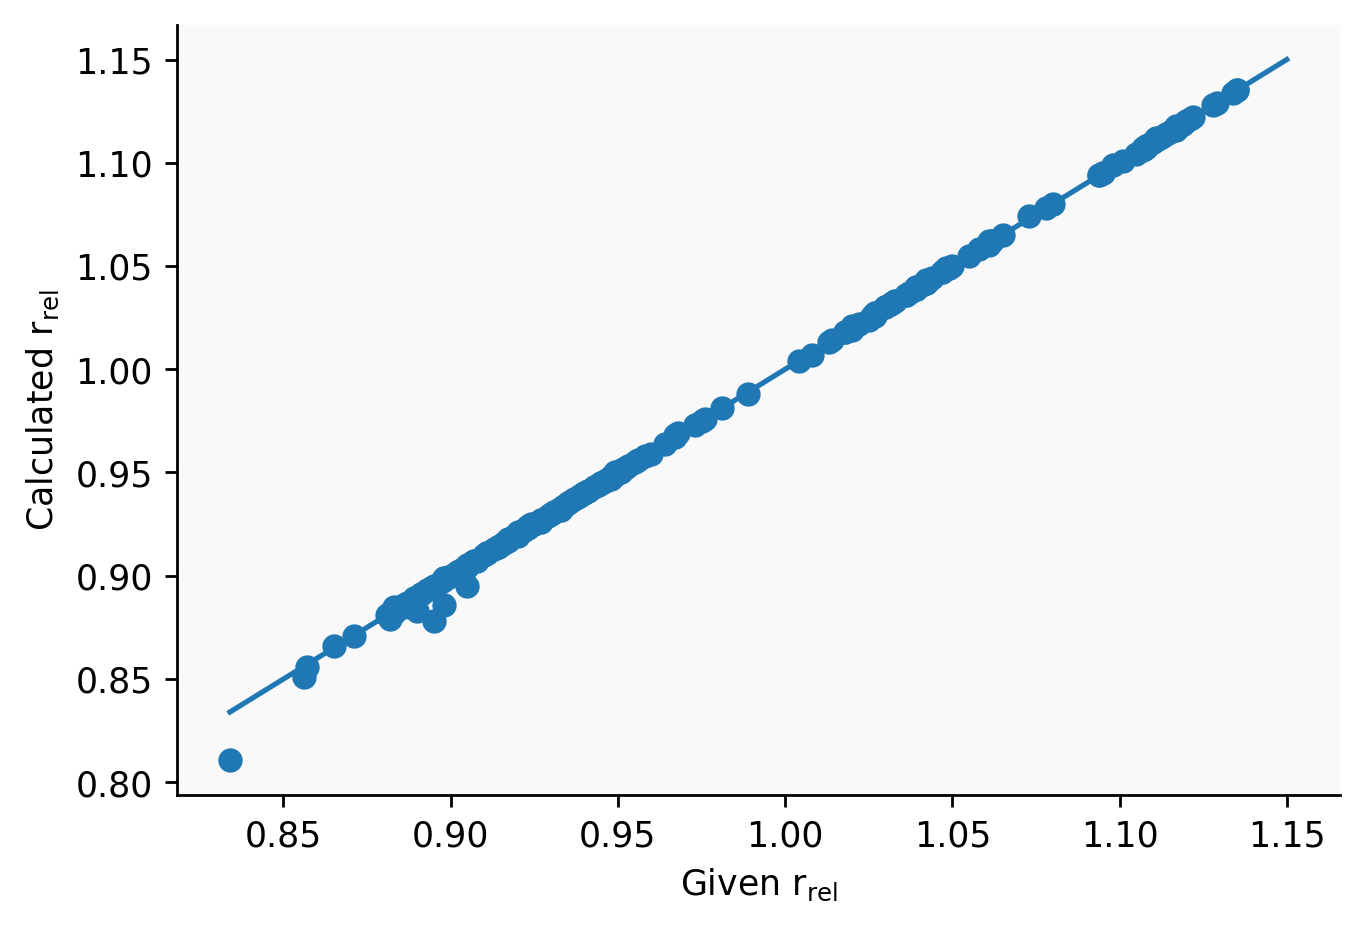

In [15]:
# Allows to visualize how the datasets are distributed (X == X --> all the data or chose X == X_train or X == X_test).
fig = plt.figure(figsize=(6, 4), dpi=250)
ax = fig.add_subplot(111)
ax.set(xlabel = r'Given $\mathrm{r_{rel}}$', ylabel = r'Calculated $\mathrm{r_{rel}}$')
ax.scatter(rel_m_dataset_225_given, ordered_rel_m_dataset_225_calc)
ax.plot([0.834, 1.15],[0.834, 1.15])
plt.grid(False)
# Add a subtle background color
ax.set_facecolor('#f9f9f9')

# Remove spines for cleaner appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### It seems the formula was well coded as only a few points are not following a perfect relationship.

### Files are created in the correct synthax to be optimized; the parameters of the calculations are added at the top of the file. The charge of the complex and the spin multiplicity are written in the same line and then the coordinate block is written. 
### In this block, there is first the symbol of the atom, then 0 if it's a heavy atom and -1 if it's a hydrogen (the -1 means that it is an atom that will have its position optimized) and finally the x y z coordinates. A blank line has to be written at the end of the file.

In [16]:
i = 0

folder = Path("Iron_150_complexes_to_optimize_com")
folder.mkdir(exist_ok=True)


# Looks through all the files in the 1-Iron folder.
for entry in parent_folder.iterdir():
    # Finds the name of the complex by replacing the end of name.
    refcode = entry.name.replace('_TMC_1.gmol', '')
    # If the complex is in the dataset of octahedral iron complexes that weren't use in the training/testing of the model, calculate the R0
    if refcode in df_150_list_refcode:
        # Defines the path of the file to write in relative to the coding direction.
        file_path = Path(f'{folder}/{refcode}_1_opt.com')

        # Creates the cell2mol object
        path = f'1-Iron/{entry.name}'
        mol = np.load(path, allow_pickle = True)
        charge = mol.totcharge
        multiplicity = (mol.eleccount - mol.totcharge) % 2 + 1


    
        with file_path.open('w') as f:
            f.write(f"""%nproc=4
%mem=12gb
#p UB3LYP/def2svp opt=(maxstep=50) IOp(3/76=1000001500) IOp(3/77=0720008500) IOp(3/78=0810010000) scf=(maxconventionalcycles=120,xqc) int=ultrafine
#p EmpiricalDispersion=GD3BJ

{refcode}_1_opt

{charge} {multiplicity}
""")
            for atom, coord in zip(mol.labels, mol.coord):
                if atom == 'H':
                    f.write(f"{atom} 0 {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n")
                else:
                    f.write(f"{atom} -1 {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n")
                    
            f.write('\n')
                    
    
        # Tracks the number of complexes to be sure that the ones in the dataset with 15837 complexes are the same as in the dataset of 1-Iron.

        
        i+=1


print(i)
    

150


### After optimization, the log files were translated to xyz files using openbabel. These files have to changed to have the parameters of calculations at the top of the file. They were submitted to SPE calculations in high and low spins.

In [17]:
i = 0

folder = Path("Low_spin_SPE_calculation")
folder.mkdir(exist_ok=True)

parent_folder = Path('optimized_geom')

# Looks through all the files in the 1-Iron folder.
for entry in parent_folder.iterdir():
    # Finds the name of the complex by replacing the end of name.
    refcode = entry.name.replace('.xyz', '')
    # If the complex is in the dataset of octahedral iron complexes that weren't use in the training/testing of the model, calculate the R0
    if refcode in df_150_list_refcode:

        optimized_coordinates_file = f"optimized_geom/{refcode}.xyz"
        # Open the input file and read lines
        with open(optimized_coordinates_file, 'r') as xyz:
            coords = xyz.readlines()

        # Creates the cell2mol object
        path = f'1-Iron/{refcode}_TMC_1.gmol'
        mol = np.load(path, allow_pickle = True)
        charge = mol.totcharge
        low_spin = (mol.eleccount - mol.totcharge) % 2 + 1
        # Defines the path of the file to write in relative to the coding direction.
        file_path = Path(f'{folder}/{refcode}_1_opt_{low_spin}_SPE.com')

        with file_path.open('w') as f:
            f.write(f"""%nproc=4
%mem=12gb
#p UB3LYP/def2TZVP IOp(3/76=1000001500) IOp(3/77=0720008500) IOp(3/78=0810010000) scf=(maxconventionalcycles=120,xqc) int=ultrafine
#p EmpiricalDispersion=GD3BJ

{refcode}_1_opt_{low_spin}_SPE

{charge} {low_spin}
""")
            f.writelines(coords[2:])
                    
            f.write('\n')
                    
    
        # Tracks the number of complexes to be sure that the ones in the dataset with 15837 complexes are the same as in the dataset of 1-Iron.

        
        i+=1


print(i)
    

150


In [18]:
i = 0

folder = Path("High_spin_SPE_calculation")
folder.mkdir(exist_ok=True)

parent_folder = Path('optimized_geom')

# Looks through all the files in the 1-Iron folder.
for entry in parent_folder.iterdir():
    # Finds the name of the complex by replacing the end of name.
    refcode = entry.name.replace('.xyz', '')
    # If the complex is in the dataset of octahedral iron complexes that weren't use in the training/testing of the model, calculate the R0
    if refcode in df_150_list_refcode:

        optimized_coordinates_file = f"optimized_geom/{refcode}.xyz"
        # Open the input file and read lines
        with open(optimized_coordinates_file, 'r') as xyz:
            coords = xyz.readlines()

        # Creates the cell2mol object
        path = f'1-Iron/{refcode}_TMC_1.gmol'
        mol = np.load(path, allow_pickle = True)
        charge = mol.totcharge
        low_spin = (mol.eleccount - mol.totcharge) % 2 + 1
        if low_spin == 1:
            high_spin = 5
        elif low_spin == 2:
            high_spin = 6

        # Defines the path of the file to write in relative to the coding direction.
        file_path = Path(f'{folder}/{refcode}_1_opt_{high_spin}_SPE.com')

        with file_path.open('w') as f:
            f.write(f"""%nproc=4
%mem=12gb
#p UB3LYP/def2TZVP IOp(3/76=1000001500) IOp(3/77=0720008500) IOp(3/78=0810010000) scf=(maxconventionalcycles=120,xqc) int=ultrafine
#p EmpiricalDispersion=GD3BJ

{refcode}_1_opt_{high_spin}_SPE

{charge} {high_spin}
""")
            f.writelines(coords[2:])
                    
            f.write('\n')
                    
    
        # Tracks the number of complexes to be sure that the ones in the dataset with 15837 complexes are the same as in the dataset of 1-Iron.

        
        i+=1


print(i)
    

150


### The energy value obtained from the calculation was obtained from the log files out of the two types of SPE calculations. The spin value calculated was also collected. Overall, all relevant information were put in the file real_world_energies_and_relative_metal_radius.csv